# Importing packages

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Loading the files

In [2]:
df = pd.read_csv('iq.csv')
df.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
1,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
3,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
4,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [3]:
df.year.value_counts()

2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2000    26
2010    26
Name: year, dtype: int64

In [4]:
years = np.arange(2001, 2011)
bar = np.array([26, 78, 130, 182, 234, 286, 338, 390, 442, 494])

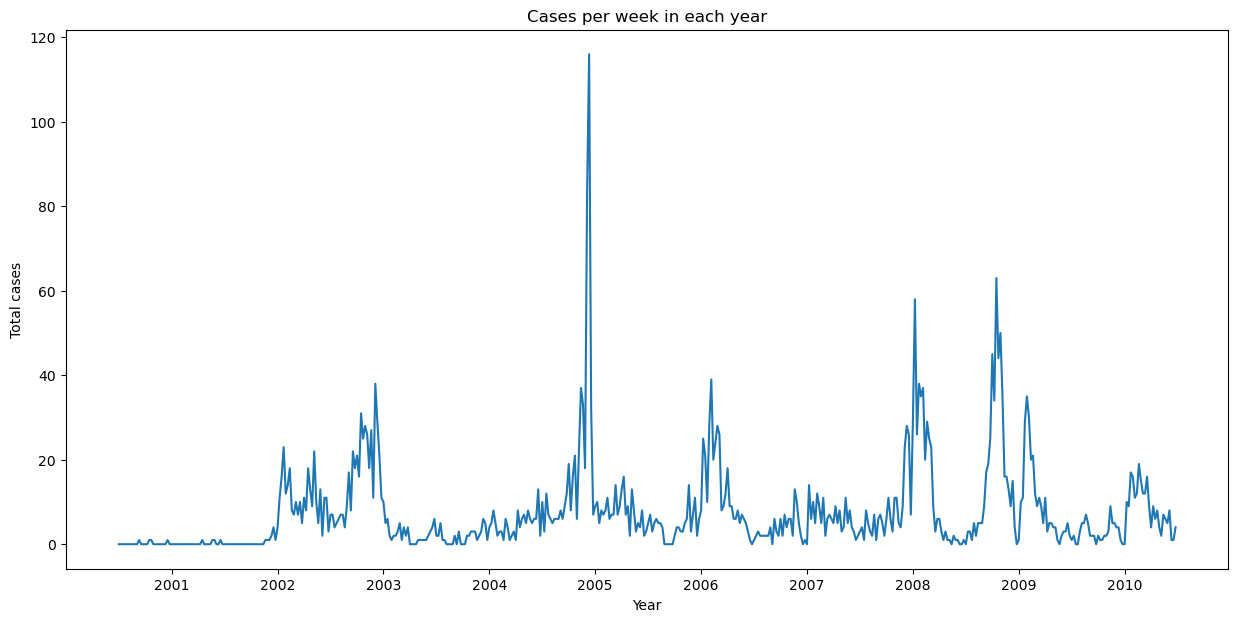

In [5]:
plt.figure(figsize=(15,7))
plt.plot(df.total_cases)
plt.xlabel('Year')
plt.ylabel('Total cases')
plt.title('Cases per week in each year')
plt.xticks(bar,years);

In [6]:
df[['reanalysis_dew_point_temp_k',
'reanalysis_air_temp_k',
'reanalysis_max_air_temp_k',
'reanalysis_min_air_temp_k',
'reanalysis_avg_temp_k']] = df[['reanalysis_dew_point_temp_k',
'reanalysis_air_temp_k',
'reanalysis_max_air_temp_k',
'reanalysis_min_air_temp_k',
'reanalysis_avg_temp_k']]-273.15

## Precipitation

In [7]:
df[['station_precip_mm','precipitation_amt_mm','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2']].describe()

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,504.000000,516.000000,516.000000,516.000000
mean,62.467262,64.245736,64.245736,57.609864
std,63.245958,35.218995,35.218995,50.286555
min,0.000000,0.000000,0.000000,0.000000
25%,17.200000,39.105000,39.105000,24.065000
50%,45.300000,60.470000,60.470000,46.440000
75%,85.950000,85.757500,85.757500,71.072500
max,543.300000,210.830000,210.830000,362.030000


In [8]:
df.drop(['precipitation_amt_mm','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2'], axis=1, inplace=True)

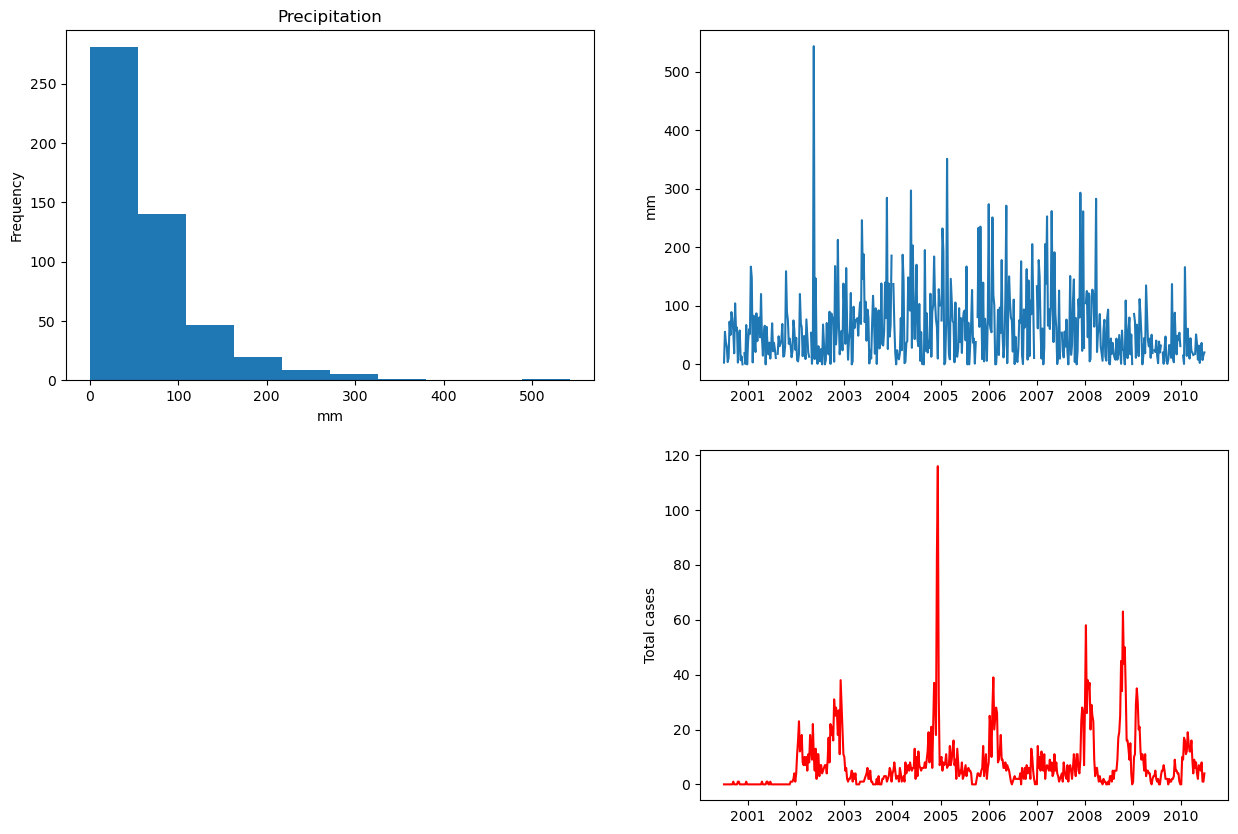

In [9]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_precip_mm)
ax1.set_title('Precipitation')
ax1.set_xlabel('mm')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_precip_mm)
ax2.set_ylabel('mm')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

In [10]:
ax1.hist(df.station_precip_mm)

(array([281., 140.,  47.,  20.,   9.,   5.,   1.,   0.,   0.,   1.]),
 array([  0.  ,  54.33, 108.66, 162.99, 217.32, 271.65, 325.98, 380.31,
        434.64, 488.97, 543.3 ]),
 <BarContainer object of 10 artists>)

## Humidity

In [11]:
df[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].describe()

,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
count,516.000000,516.000000
mean,88.639117,17.096110
std,7.583889,1.445769
min,57.787143,12.111429
25%,84.295000,16.102857
50%,90.917143,17.428571
75%,94.563929,18.180357
max,98.610000,20.461429


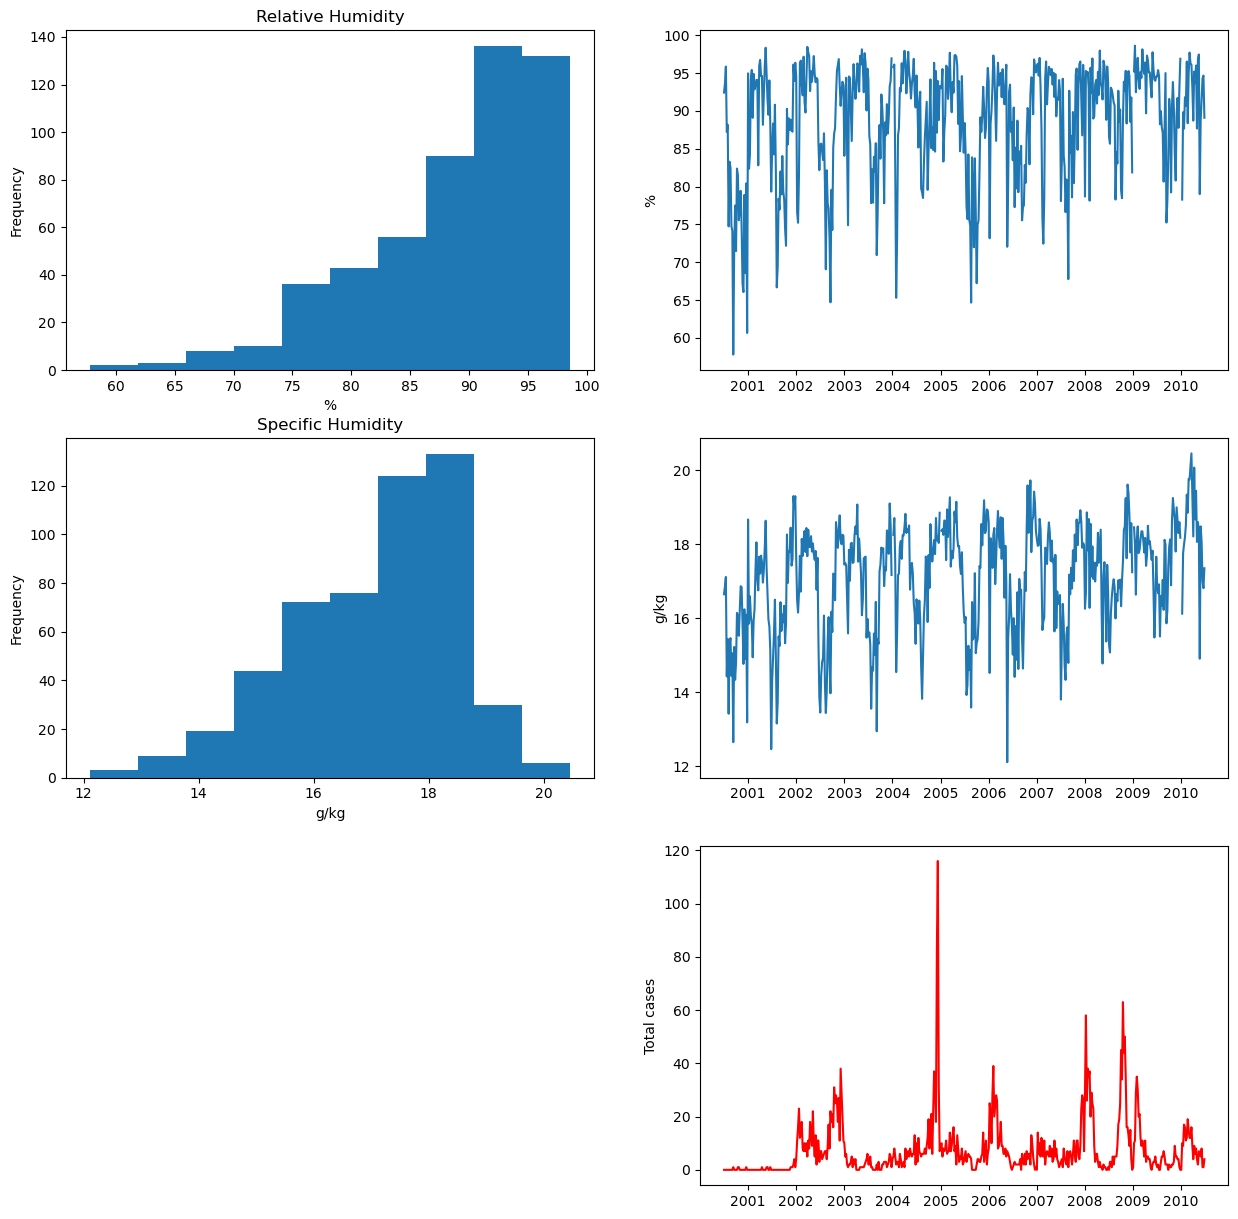

In [12]:
plt.figure(figsize=(15,15))

ax1 = plt.subplot(3, 2, 1)
ax1.hist(df.reanalysis_relative_humidity_percent)
ax1.set_title('Relative Humidity')
ax1.set_xlabel('%')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(3, 2, 2)
ax2.plot(df.reanalysis_relative_humidity_percent)
ax2.set_ylabel('%')
ax2.set_xticks(bar,years);

ax1 = plt.subplot(3, 2, 3)
ax1.hist(df.reanalysis_specific_humidity_g_per_kg)
ax1.set_title('Specific Humidity')
ax1.set_xlabel('g/kg')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(3, 2, 4)
ax2.plot(df.reanalysis_specific_humidity_g_per_kg)
ax2.set_ylabel('g/kg')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(3, 2, 6)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

## Average temperature

In [13]:
df[['station_avg_temp_c','reanalysis_avg_temp_k','reanalysis_air_temp_k']].describe()

,station_avg_temp_c,reanalysis_avg_temp_k,reanalysis_air_temp_k
count,483.000000,516.000000,516.000000
mean,27.530933,25.983043,24.719538
std,0.921769,1.332073,1.170997
min,21.400000,21.742857,21.485714
25%,27.000000,25.071429,23.942500
50%,27.600000,25.971429,24.672857
75%,28.100000,26.973214,25.499286
max,30.800000,29.778571,28.487143


In [14]:
df.drop(['reanalysis_avg_temp_k','reanalysis_air_temp_k'], axis=1, inplace=True)

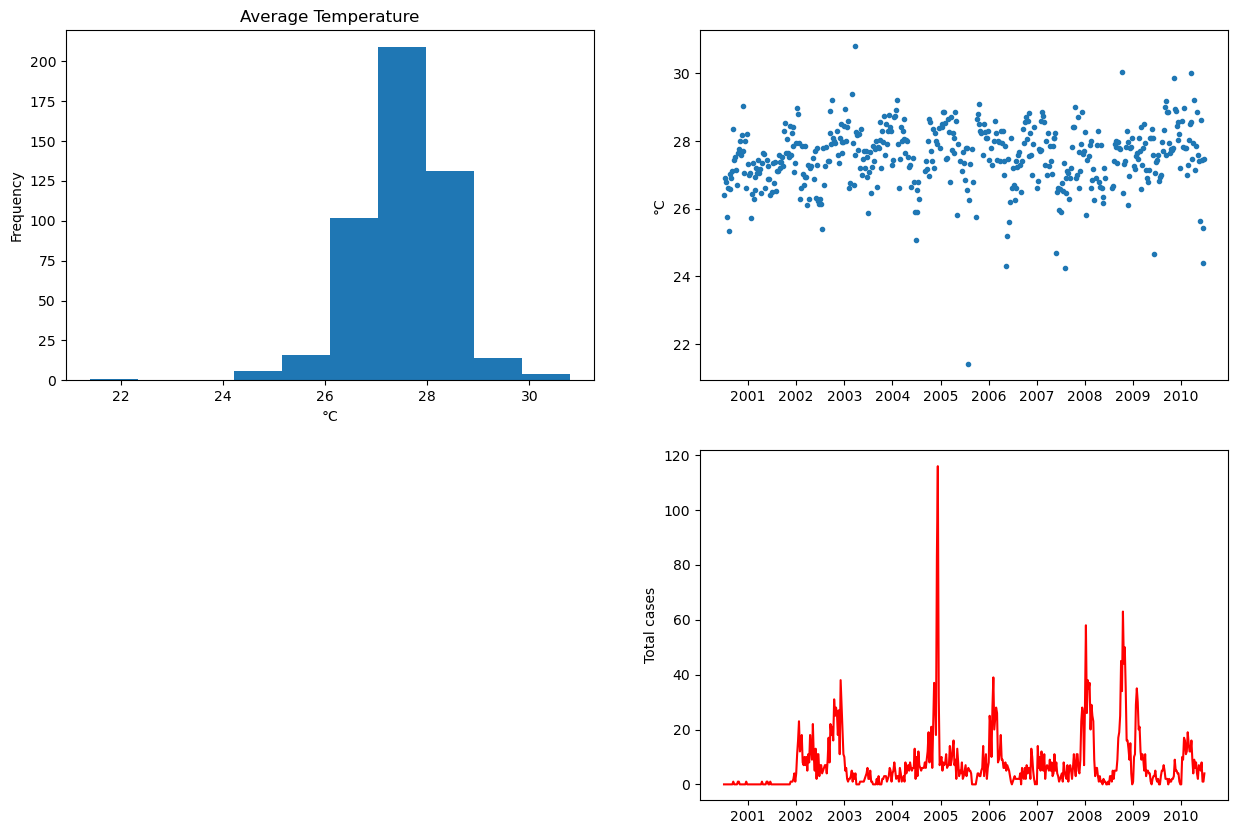

In [15]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_avg_temp_c)
ax1.set_title('Average Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_avg_temp_c,'.')
ax2.set_ylabel('°C')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

## Maximum temperature

In [16]:
df[['station_max_temp_c','reanalysis_max_air_temp_k']].describe()

,station_max_temp_c,reanalysis_max_air_temp_k
count,506.000000,516.000000
mean,34.004545,33.932752
std,1.325261,2.382980
min,30.100000,26.850000
25%,33.200000,32.050000
50%,34.000000,33.900000
75%,34.900000,35.550000
max,42.200000,40.850000


In [17]:
df.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

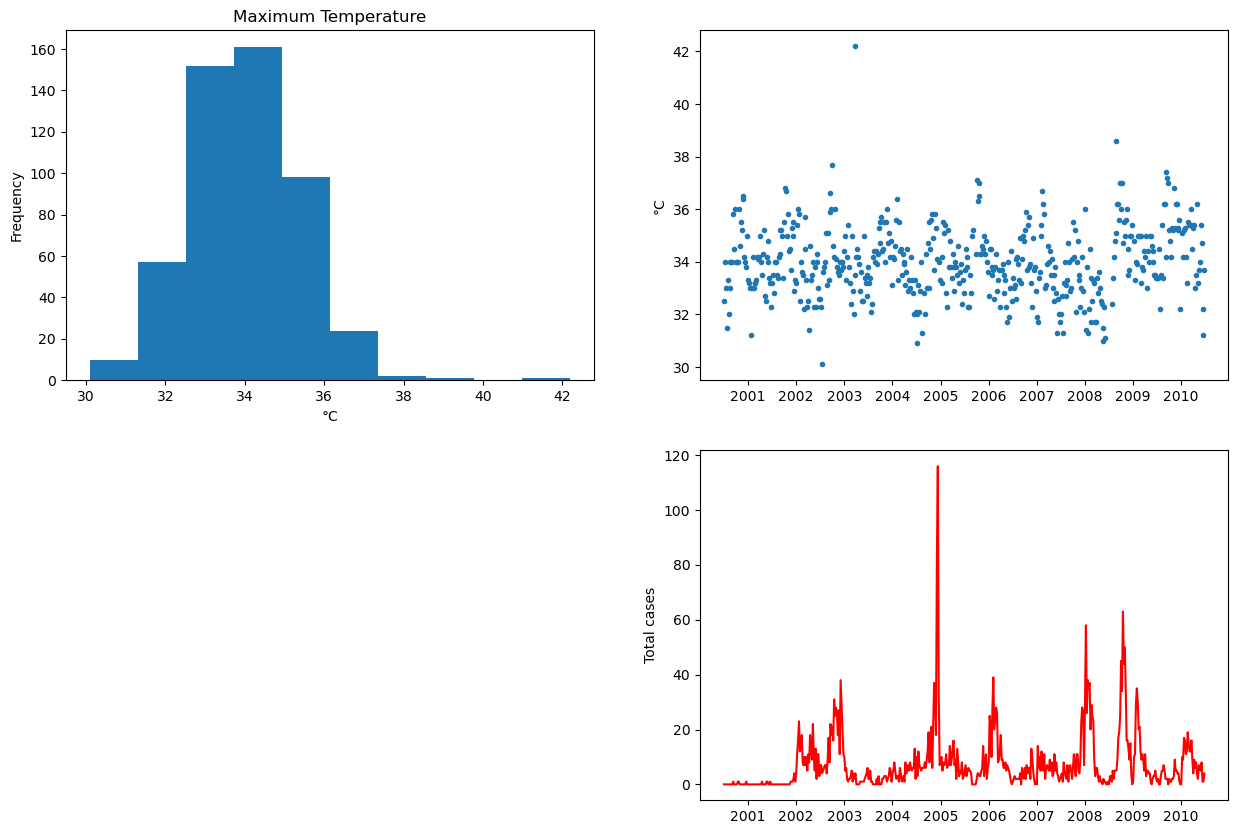

In [18]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_max_temp_c)
ax1.set_title('Maximum Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_max_temp_c,'.')
ax2.set_ylabel('°C')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

## Minimum temperature

In [19]:
df[['station_min_temp_c','reanalysis_min_air_temp_k']].describe()

,station_min_temp_c,reanalysis_min_air_temp_k
count,512.000000,516.000000
mean,21.196680,19.716667
std,1.260327,1.663069
min,14.700000,13.750000
25%,20.600000,18.825000
50%,21.300000,19.900000
75%,22.000000,21.050000
max,24.200000,22.850000


In [20]:
df.drop('reanalysis_min_air_temp_k', axis=1, inplace=True)

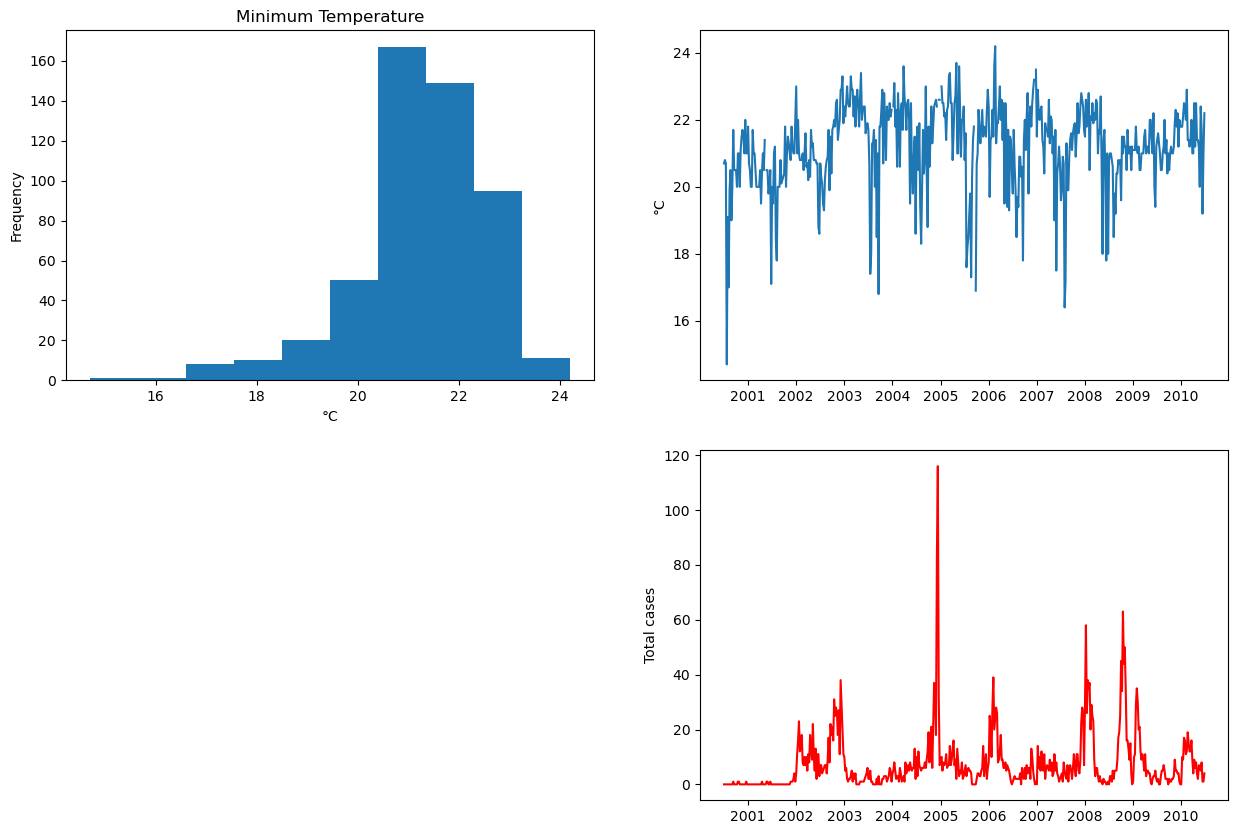

In [21]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_min_temp_c)
ax1.set_title('Minimum Temperature')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_min_temp_c)
ax2.set_ylabel('°C')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

## Diurnal temperature range

In [22]:
df[['station_diur_temp_rng_c','reanalysis_tdtr_k']].describe()

,station_diur_temp_rng_c,reanalysis_tdtr_k
count,483.000000,516.000000
mean,10.566197,9.206783
std,1.535496,2.448525
min,5.200000,3.714286
25%,9.500000,7.371429
50%,10.625000,8.964286
75%,11.655000,11.014286
max,15.800000,16.028571


In [23]:
df.drop('reanalysis_tdtr_k', axis=1, inplace=True)

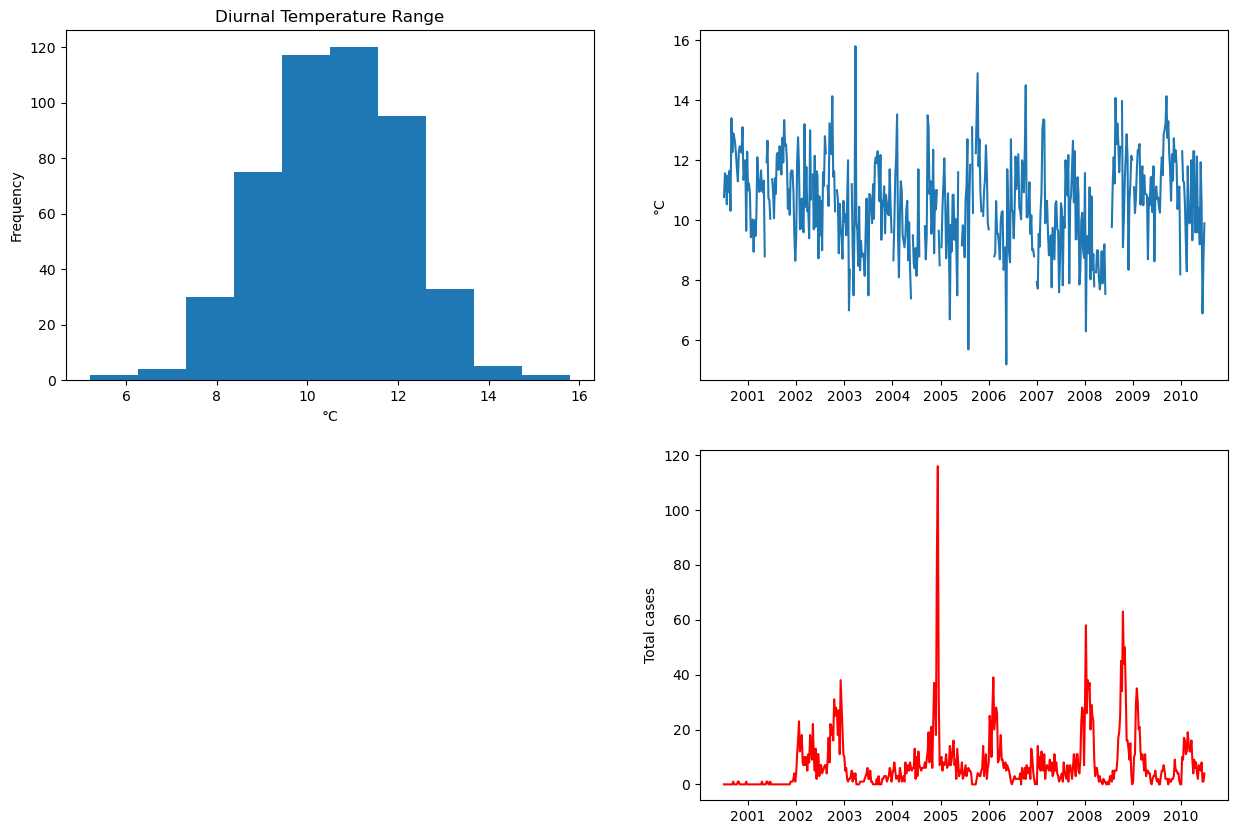

In [24]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.station_diur_temp_rng_c)
ax1.set_title('Diurnal Temperature Range')
ax1.set_xlabel('°C')
ax1.set_ylabel('Frequency')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(df.station_diur_temp_rng_c)
ax2.set_ylabel('°C')
ax2.set_xticks(bar,years);

ax3 = plt.subplot(2, 2, 4)
ax3.plot(df.total_cases, 'r')
ax3.set_ylabel('Total cases')
ax3.set_xticks(bar,years);

plt.show()

## Looking at the df again

As we decided to only use the week of the year, delete the week start date. Dew point can also be extracted from other variables, so it makes no sense to let it here. 

In [25]:
df.drop(['week_start_date','reanalysis_dew_point_temp_k'], axis=1, inplace=True)
df

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,2000,26,0.192886,0.132257,0.340886,0.247200,92.418571,16.651429,26.400000,10.775000,32.5,20.7,3.0,0
1,2000,27,0.216833,0.276100,0.289457,0.241657,93.581429,16.862857,26.900000,11.566667,34.0,20.8,55.6,0
2,2000,28,0.176757,0.173129,0.204114,0.128014,95.848571,17.120000,26.800000,11.466667,33.0,20.7,38.1,0
3,2000,29,0.227729,0.145429,0.254200,0.200314,87.234286,14.431429,25.766667,10.533333,31.5,14.7,30.0,0
4,2000,30,0.328643,0.322129,0.254371,0.361043,88.161429,15.444286,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2010,21,0.342750,0.318900,0.256343,0.292514,88.765714,18.485714,28.633333,11.933333,35.4,22.4,27.0,5
516,2010,22,0.160157,0.160371,0.136043,0.225657,91.600000,18.070000,27.433333,10.500000,34.7,21.7,36.6,8
517,2010,23,0.247057,0.146057,0.250357,0.233714,94.280000,17.008571,24.400000,6.900000,32.2,19.2,7.4,1
518,2010,24,0.333914,0.245771,0.278886,0.325486,94.660000,16.815714,25.433333,8.733333,31.2,21.0,16.0,1


# NDVI

In [26]:
df[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,517.000000,517.000000,517.000000,517.000000
mean,0.263869,0.238783,0.250126,0.266779
std,0.081370,0.076751,0.077354,0.086345
min,0.061729,0.035860,0.029880,0.064183
25%,0.200000,0.179540,0.194743,0.204129
50%,0.263643,0.232971,0.249800,0.262143
75%,0.319971,0.293929,0.302300,0.325150
max,0.508357,0.454429,0.538314,0.546017


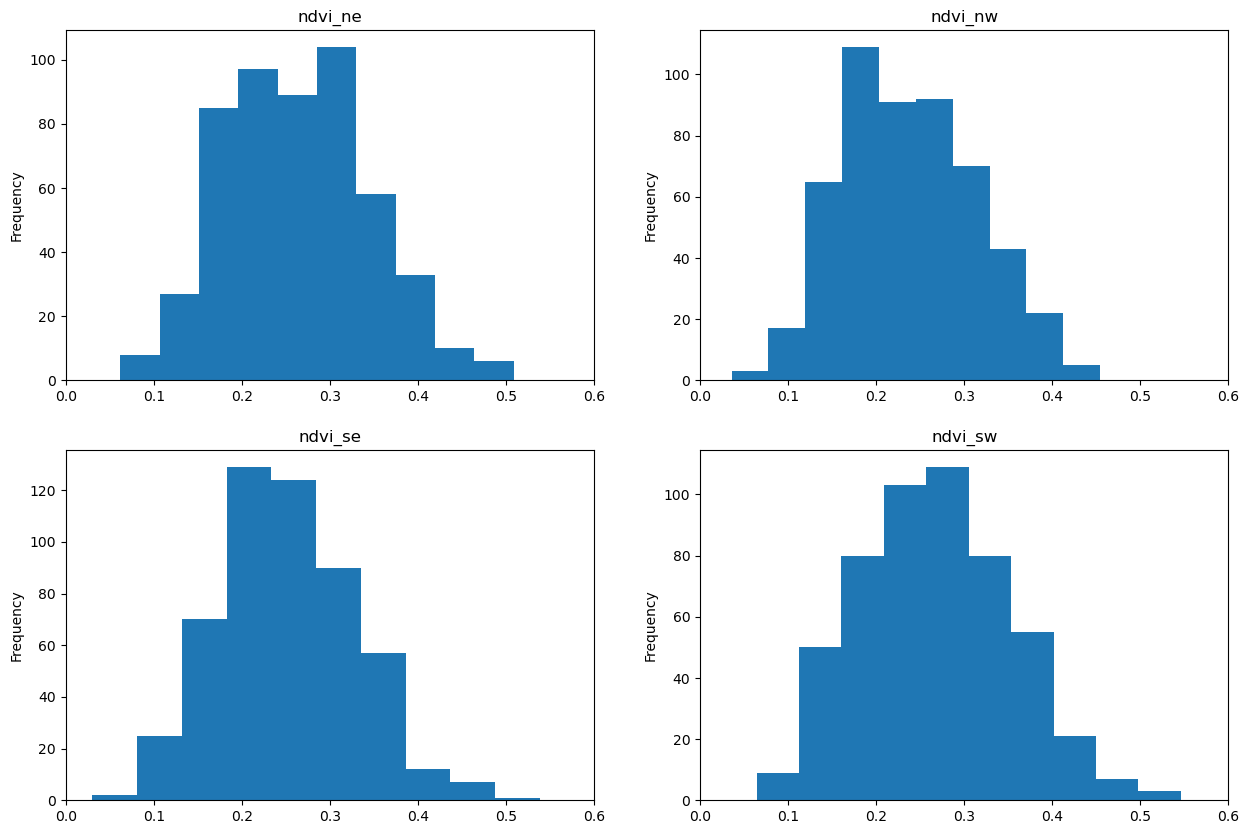

In [27]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.ndvi_ne)
ax1.set_title('ndvi_ne')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,0.6)

ax2 = plt.subplot(2, 2, 2)
ax2.hist(df.ndvi_nw)
ax2.set_title('ndvi_nw')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0,0.6)

ax3 = plt.subplot(2, 2, 3)
ax3.hist(df.ndvi_se)
ax3.set_title('ndvi_se')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0,0.6)

ax4 = plt.subplot(2, 2, 4)
ax4.hist(df.ndvi_sw)
ax4.set_title('ndvi_sw')
ax4.set_ylabel('Frequency')
ax4.set_xlim(0,0.6)

plt.show()

In general, NDVI values range from -1.0 to 1.0:
- <0: clouds and water, 
- ~0: bare soil, 
- 0.1 - 0.5: sparse vegetation,
- \> 0.6: dense green vegetation. 


Source: https://ipad.fas.usda.gov/cropexplorer/Definitions/spotveg.htm#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI)%3A&text=In%20general%2C%20NDVI%20values%20range,vegetation%20(0.6%20and%20above).

## Correlations

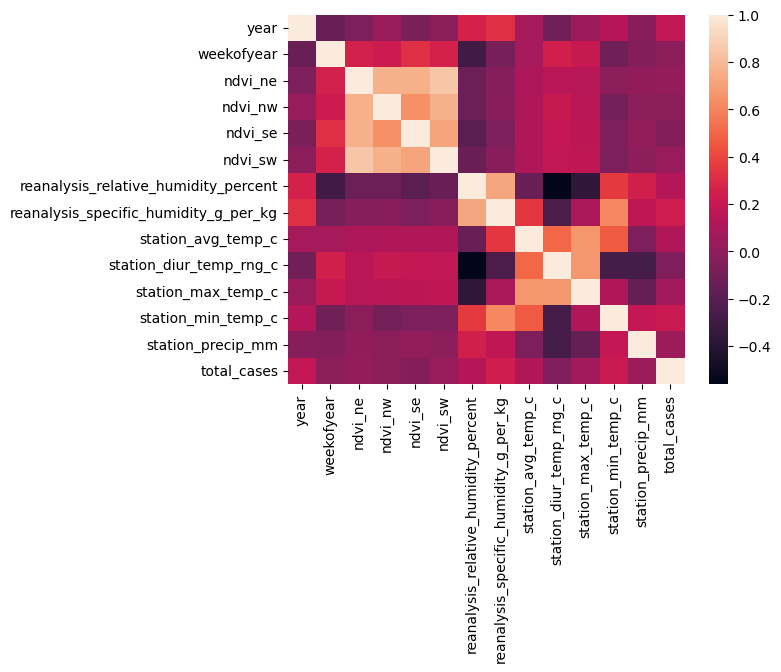

In [28]:
df_correlations = df.corr()
df_corr_heat = sns.heatmap(df_correlations)

<Axes: >

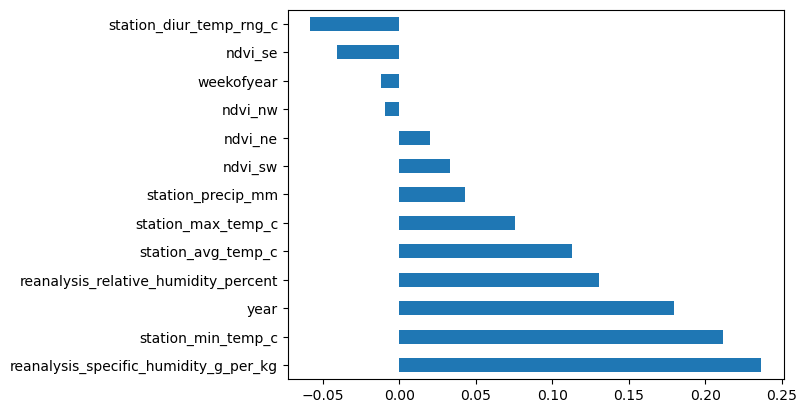

In [29]:
(df_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())